In [1]:
# Данные тут
# статья https://statmodeling.stat.columbia.edu/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/
# данные https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

In [2]:
temp = pd.read_csv('births.csv')
display(temp.head(3))
display(temp.tail(3))
temp.info()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454


,year,month,day,gender,births
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [30]:
df = temp.pivot(index=['year','month','day'], columns='gender', values='births').reset_index()
display(df.head(3))
df.columns.name=None
display(df.describe())
display(df.head(3))

gender,year,month,day,F,M
0,1969,1,1.0,4046.0,4440.0
1,1969,1,2.0,4454.0,4548.0
2,1969,1,3.0,4548.0,4994.0


,year,month,day,F,M
count,7807.000000,7807.000000,7567.000000,7776.000000,7771.000000
mean,1979.041885,6.515051,18.043610,9521.067773,10003.674559
std,6.721914,3.449983,15.926234,27868.629759,29220.529186
min,1969.000000,1.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4257.000000,4478.500000
50%,1979.000000,7.000000,16.000000,4688.500000,4938.000000
75%,1984.000000,10.000000,24.000000,5150.000000,5422.500000
max,2008.000000,12.000000,99.000000,191495.000000,199622.000000


,year,month,day,F,M
0,1969,1,1.0,4046.0,4440.0
1,1969,1,2.0,4454.0,4548.0
2,1969,1,3.0,4548.0,4994.0


In [31]:
df[df['day'].isna()]

,year,month,day,F,M
7567,1989,1,NaN,156749.0,164052.0
7568,1989,2,NaN,146710.0,154047.0
7569,1989,3,NaN,165889.0,174433.0
7570,1989,4,NaN,155689.0,163432.0
7571,1989,5,NaN,163800.0,172892.0
...,...,...,...,...,...
7802,2008,8,NaN,182713.0,191315.0
7803,2008,9,NaN,179696.0,188964.0
7804,2008,10,NaN,175314.0,183219.0
7805,2008,11,NaN,158939.0,165468.0


In [32]:
df[df['year']==1989]

,year,month,day,F,M
7567,1989,1,NaN,156749.0,164052.0
7568,1989,2,NaN,146710.0,154047.0
7569,1989,3,NaN,165889.0,174433.0
7570,1989,4,NaN,155689.0,163432.0
7571,1989,5,NaN,163800.0,172892.0
7572,1989,6,NaN,165525.0,173823.0
7573,1989,7,NaN,174054.0,183063.0
7574,1989,8,NaN,178986.0,188074.0
7575,1989,9,NaN,174808.0,182962.0
7576,1989,10,NaN,168303.0,176258.0


In [33]:
df = df.replace({'day': 99}, np.nan)
df.dropna(inplace = True)
df.reset_index(drop=True)
df.describe()

,year,month,day,F,M
count,7349.000000,7349.000000,7349.000000,7349.000000,7349.000000
mean,1978.468499,6.520615,15.819023,4674.129541,4917.172268
std,5.769690,3.449419,8.849751,657.634630,694.698847
min,1969.000000,1.000000,1.000000,1.000000,1.000000
25%,1973.000000,4.000000,8.000000,4274.000000,4490.000000
50%,1978.000000,7.000000,16.000000,4680.000000,4933.000000
75%,1983.000000,10.000000,23.000000,5119.000000,5386.000000
max,1988.000000,12.000000,31.000000,6332.000000,6527.000000


In [34]:
df.index = pd.PeriodIndex.from_fields(year=df.year, month=df.month, day=df.day, freq='D')
df['Sum'] = df[['F','M']].sum(axis = 1)
df['Dayofweek'] =  df.index.dayofweek

birhts_full = df.drop(['year','month','day'], axis = 1).copy().sort_index()
birhts = birhts_full.copy()

In [35]:
birhts[birhts.index.duplicated()]

,F,M,Sum,Dayofweek
1969-03-01,4402.0,4784.0,9186.0,5
1969-03-02,4204.0,4376.0,8580.0,6
1969-03-03,4874.0,5194.0,10068.0,0
1969-05-01,4598.0,4608.0,9206.0,3
1969-07-01,5378.0,5768.0,11146.0,1
1969-10-01,5290.0,5620.0,10910.0,2
1969-12-01,5124.0,5524.0,10648.0,0
1970-03-01,4390.0,4492.0,8882.0,6
1970-03-02,5050.0,5120.0,10170.0,0
1970-03-03,5334.0,5972.0,11306.0,1


In [36]:
birhts.loc['1978-12-01']

,F,M,Sum,Dayofweek
1978-12-01,2.0,3.0,5.0,4
1978-12-01,4779.0,4835.0,9614.0,4


In [37]:
birhts.loc['1975-10-01']

,F,M,Sum,Dayofweek
1975-10-01,4777.0,4955.0,9732.0,2
1975-10-01,6.0,2.0,8.0,2


In [38]:
birhts = birhts.rename_axis('index').sort_values(by=['index', 'Sum'])
birhts = birhts.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')
birhts[birhts.index.duplicated()]

,F,M,Sum,Dayofweek
index,,,,


In [39]:
birhts.describe()

,F,M,Sum,Dayofweek
count,7305.000000,7305.000000,7305.000000,7305.000000
mean,4702.216427,4946.723751,9648.940178,3.000274
std,550.735554,582.780745,1127.315229,1.999795
min,3249.000000,3402.000000,6675.000000,0.000000
25%,4282.000000,4501.000000,8792.000000,1.000000
50%,4687.000000,4938.000000,9622.000000,3.000000
75%,5121.000000,5390.000000,10510.000000,5.000000
max,6332.000000,6527.000000,12851.000000,6.000000


In [40]:
birhts2 = birhts_full.copy()
birhts2.index.duplicated().sum()

44

In [41]:
bt = birhts2.groupby(birhts2.index).sum()
bt.describe() ### смешное количество дней недели ;)

,F,M,Sum,Dayofweek
count,7305.000000,7305.000000,7305.000000,7305.000000
mean,4702.283094,4946.789733,9649.072827,3.017659
std,550.751259,582.800959,1127.351372,2.029989
min,3249.000000,3402.000000,6675.000000,0.000000
25%,4282.000000,4501.000000,8792.000000,1.000000
50%,4687.000000,4938.000000,9622.000000,3.000000
75%,5121.000000,5390.000000,10510.000000,5.000000
max,6332.000000,6527.000000,12851.000000,12.000000


In [42]:
bt['Dayofweek'] = bt.index.dayofweek
bt.describe()

,F,M,Sum,Dayofweek
count,7305.000000,7305.000000,7305.000000,7305.000000
mean,4702.283094,4946.789733,9649.072827,3.000274
std,550.751259,582.800959,1127.351372,1.999795
min,3249.000000,3402.000000,6675.000000,0.000000
25%,4282.000000,4501.000000,8792.000000,1.000000
50%,4687.000000,4938.000000,9622.000000,3.000000
75%,5121.000000,5390.000000,10510.000000,5.000000
max,6332.000000,6527.000000,12851.000000,6.000000


In [43]:
bt.index.duplicated().sum()

0

<Axes: xlabel='index'>

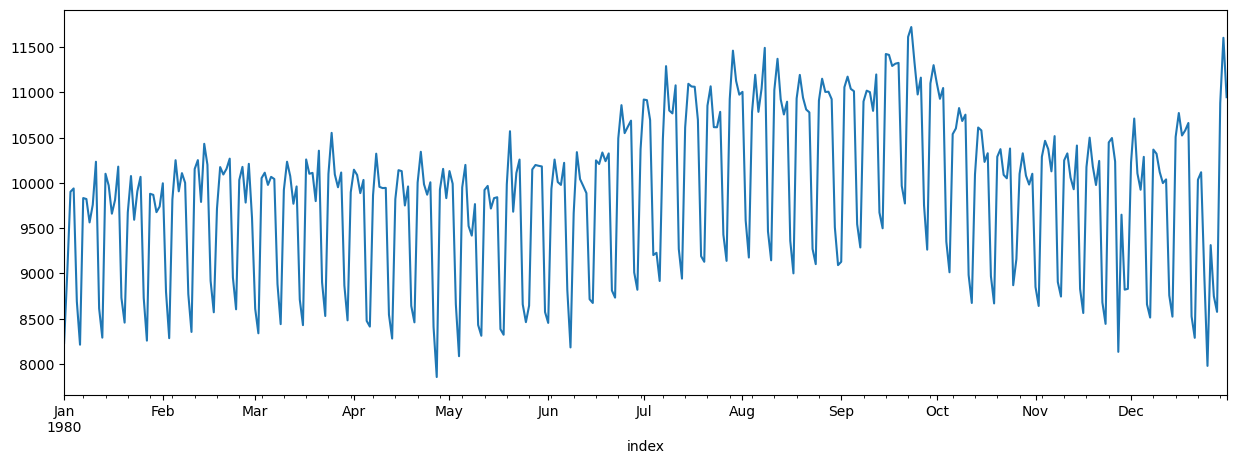

In [44]:
years_1980 = birhts.loc['1980']['Sum'].copy()
plt.figure(figsize=(15, 5))
years_1980.plot()

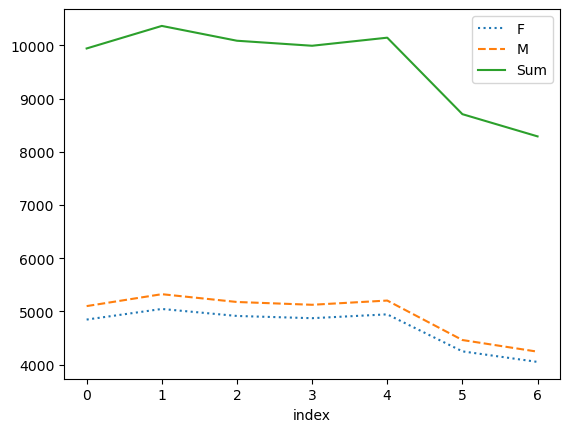

In [45]:
weekly = birhts.groupby(birhts.index.dayofweek)[['F','M','Sum']].mean()
g=weekly.plot(style=[':','--','-'])

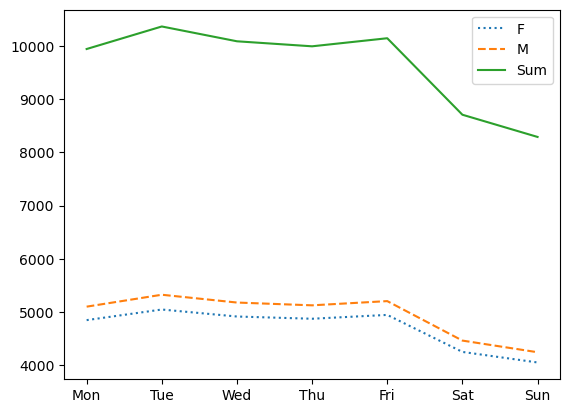

In [46]:
weekly = birhts.groupby(birhts.index.dayofweek)[['F','M','Sum']].mean()
week_name=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekly.index=week_name

g=weekly.plot(style=[':','--','-'])


<Axes: xlabel='index'>

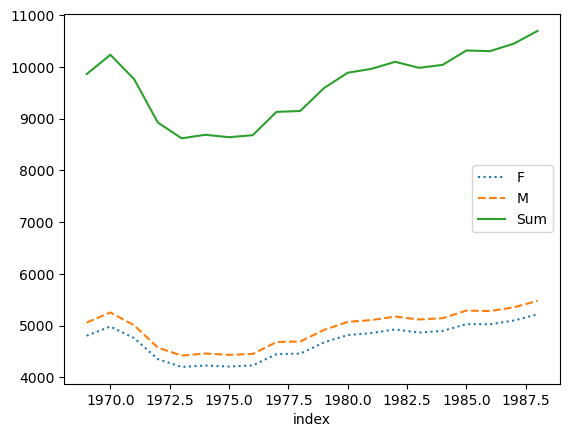

In [47]:
years = birhts.copy()
years = years.groupby(years.index.year)[['F','M','Sum']].mean()
years.plot(style=[':','--','-'])

<Axes: xlabel='index'>

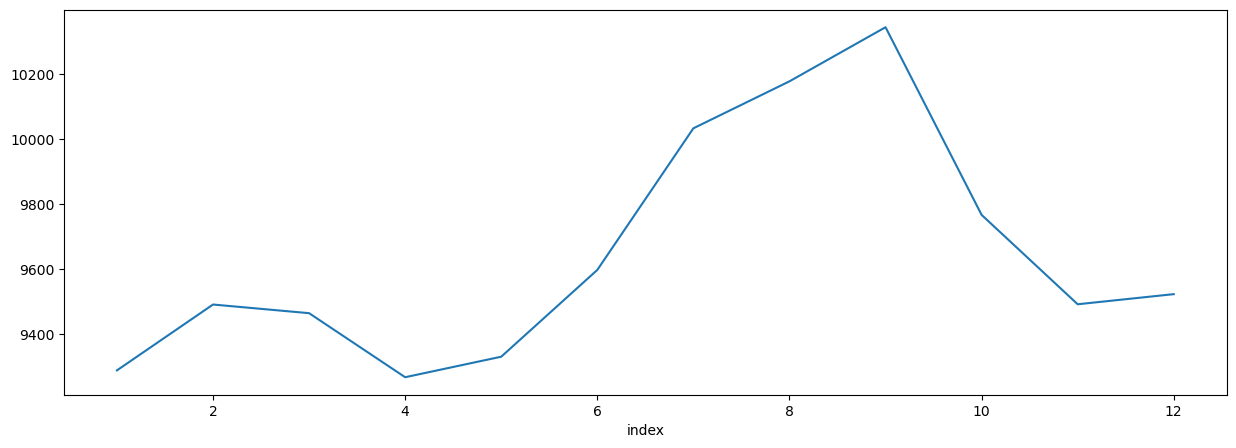

In [48]:
years = birhts.copy()
plt.figure(figsize=(15, 5))
years.groupby([years.index.month])['Sum'].mean().plot()

<Axes: xlabel='m_d'>

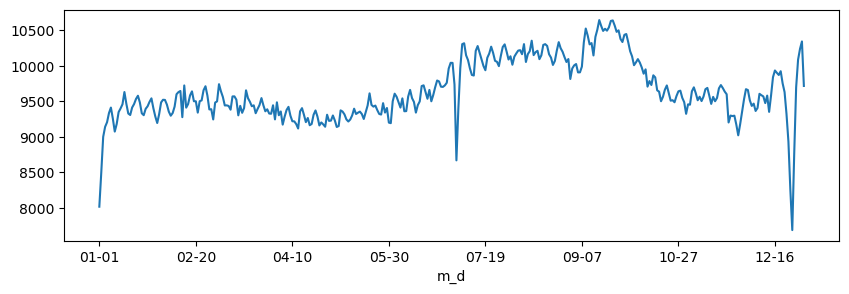

In [49]:
years = birhts.copy()
years['m_d'] = years.index.strftime('%m-%d')
years.groupby('m_d')['Sum'].mean().plot(figsize = (10,3))

<Axes: xlabel='m_d'>

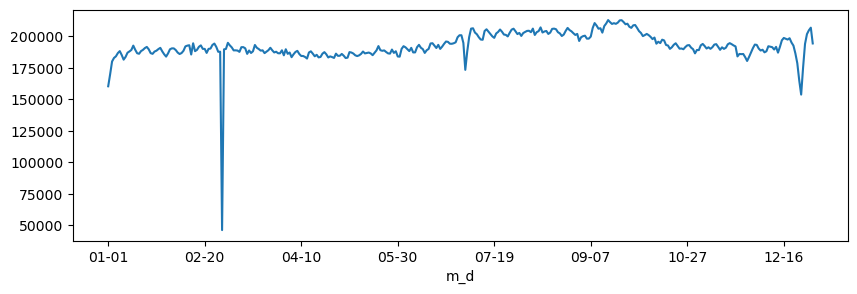

In [50]:
years.groupby('m_d')['Sum'].sum().plot(figsize = (10,3))

In [51]:
import holidays
holi_1980 = pd.Series(holidays.US(years=[1980]))
holi_1980.index = pd.to_datetime(holi_1980.index).strftime('%m-%d')
holi_1980

01-01           New Year's Day
05-26             Memorial Day
07-04         Independence Day
09-01                Labor Day
11-11             Veterans Day
11-27             Thanksgiving
12-25            Christmas Day
02-18    Washington's Birthday
10-13             Columbus Day
dtype: object

In [52]:
for_plt = years.groupby('m_d')['Sum'].mean().reset_index()
for_plt.head()

,m_d,Sum
0,01-01,8018.45
1,01-02,8494.80
2,01-03,9001.80
3,01-04,9142.70
4,01-05,9207.25


In [53]:
start_month = pd.date_range('2000-01-01', '2000-12-31', freq='MS').strftime('%m-%d')
start_month

Index(['01-01', '02-01', '03-01', '04-01', '05-01', '06-01', '07-01', '08-01',
       '09-01', '10-01', '11-01', '12-01'],
      dtype='object')

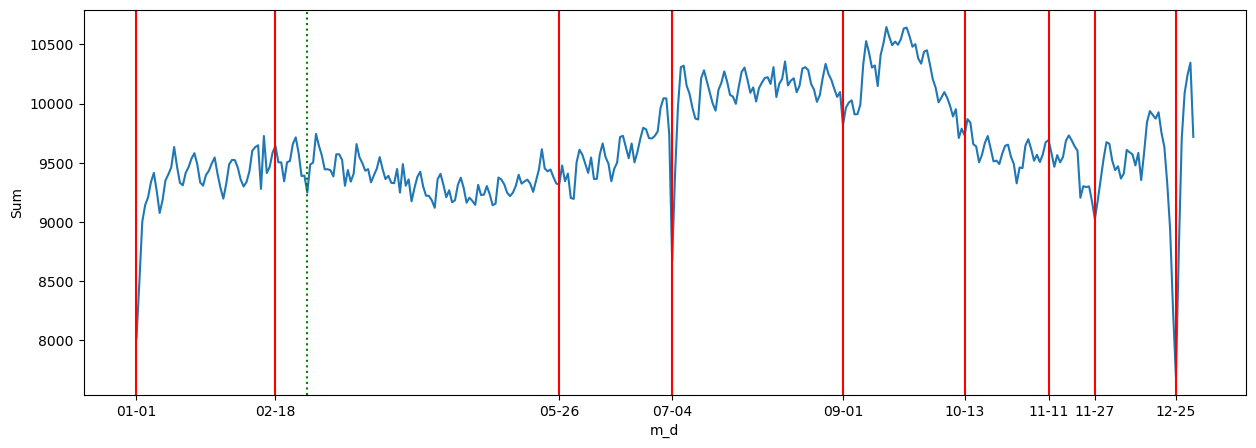

In [54]:
plt.figure(figsize=(15, 5))
sns.lineplot(data = for_plt, x = for_plt['m_d'], y='Sum')
[plt.axvline(vline, color="red", ) for vline in holi_1980.index]
plt.axvline('02-29', color="green", linestyle = ':')
plt.xticks(holi_1980.index);

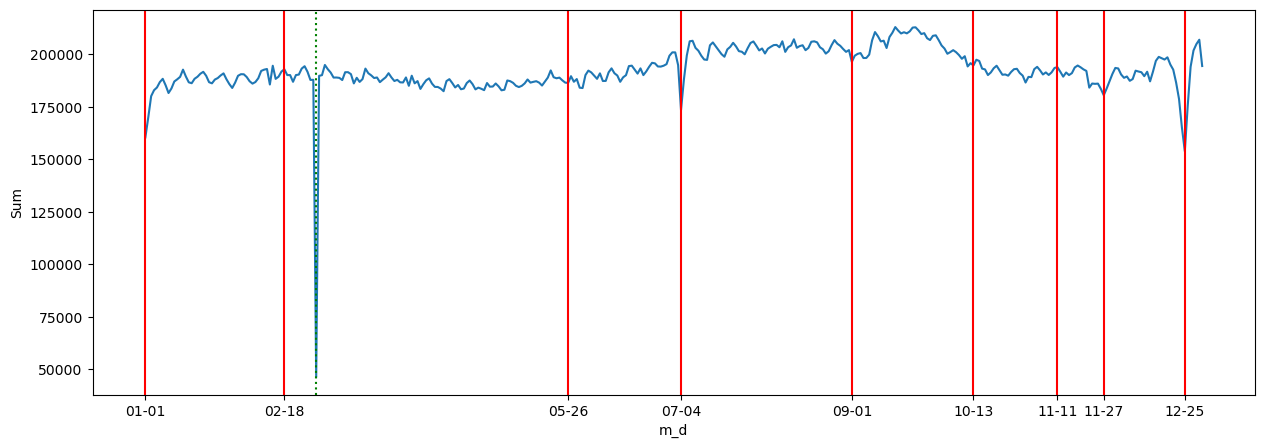

In [55]:
plt.figure(figsize=(15, 5))
for_plt = years.groupby('m_d')['Sum'].sum().reset_index()
sns.lineplot(data = for_plt, x = for_plt['m_d'], y='Sum')
[plt.axvline(vline, color="red", ) for vline in holi_1980.index]
plt.axvline('02-29', color="green", linestyle = ':')
plt.xticks(holi_1980.index);

In [56]:
# Почему значение 0,74? 
# Основным свойством нормального / гауссовского распределения является то, 
# что 50% значений находятся на максимальном расстоянии 0,67 σ от среднего значения 
# (IQR, см. Это изображение из этой статьи). 0,74 = 1 / (2x0,67). 
# «Устойчивый» означает, что на него не влияют аномальные экстремальные значения 
# (выбросы находятся за пределами IQR, поэтому не используются для оценки σ)


import scipy as sp
p1 = sp.stats.norm.ppf(0.25)  # first quartile of standard normal distribution
p2 = sp.stats.norm.ppf(0.75)  # third quartile
print(p2 - p1)  # 1.3489795003921634

sig = 1  # standard deviation of the standard normal distribution  
factor = sig / (p2 - p1)
print(factor)  # 0.74130110925280102


1.3489795003921634
0.741301109252801


,m_d,Sum
56,02-26,191623.0
57,02-27,187750.0
58,02-28,187812.0
60,03-01,189687.0
61,03-02,190022.0
62,03-03,194871.0


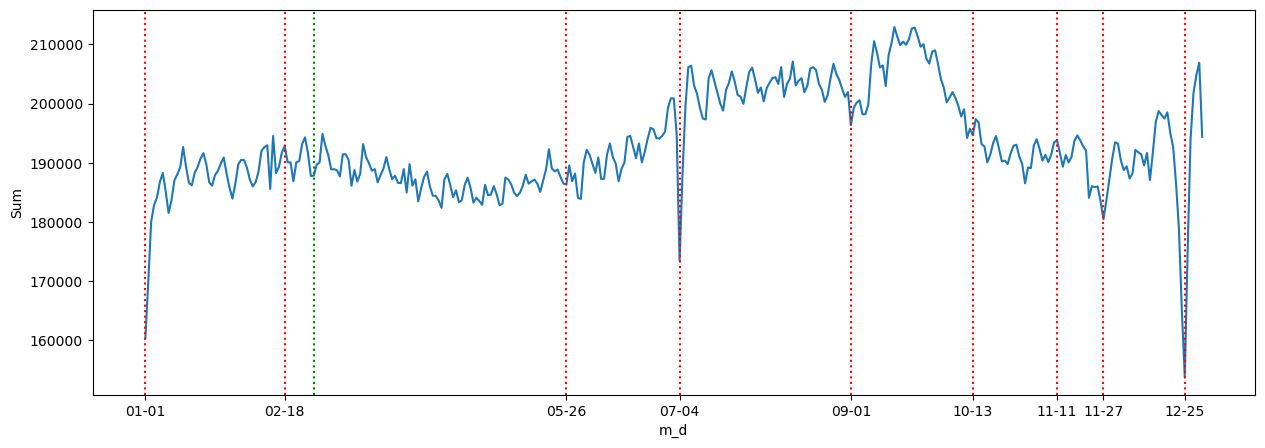

In [57]:
years = birhts.copy()
years['m_d'] = years.index.strftime('%m-%d')
quant_mean = years.groupby('m_d')['Sum'].sum().reset_index()

quartiles = np.percentile(quant_mean['Sum'], [25, 50, 75])
mu = quartiles[1]
sig = 0.7413 * (quartiles[2] - quartiles[0])
quant_mean = quant_mean.query('(Sum > @mu - 5 * @sig) & (Sum < @mu + 5 * @sig)')

plt.figure(figsize=(15, 5))
sns.lineplot(data = quant_mean, x = 'm_d', y='Sum')
[plt.axvline(vline, color="red", linestyle = ':') for vline in holi_1980.index]
plt.axvline('02-28', color="green", linestyle = ':')
plt.xticks(holi_1980.index);
# 02-29 теперь нет
quant_mean.iloc[56:62]

In [58]:
### Winsorize - https://www.codecamp.ru/blog/winsorize/


import numpy as np
from scipy.stats.mstats import winsorize

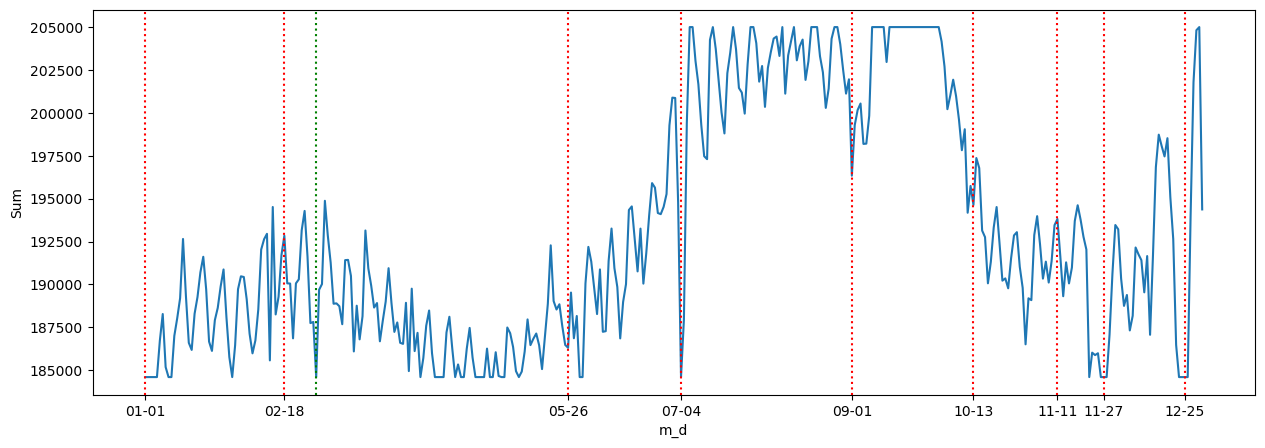

In [66]:
years = birhts.copy()
years['m_d'] = years.index.strftime('%m-%d')
years_mean = years.groupby('m_d')['Sum'].sum().reset_index()
years_mean.Sum = winsorize(years_mean.Sum, limits=[0.1,0.1])

plt.figure(figsize=(15, 5))
sns.lineplot(data = years_mean, x = 'm_d', y='Sum')
[plt.axvline(vline,color="red", linestyle=":") for vline in holi_1980.index]
plt.axvline('02-29', color="green", linestyle = ':')
plt.xticks(holi_1980.index);
plt.show()